In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('train.csv')
df_t = pd.read_csv('test.csv')

In [3]:
data.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
data.shape

(8523, 12)

In [5]:
data['source'] = 'train'
df_t['source'] = 'test'
data_1 = pd.concat([data, df_t], ignore_index=True)
print(data_1.shape, data.shape, df_t.shape)

(14204, 13) (8523, 13) (5681, 12)


C:\Users\kd\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
data_1.isnull().sum()

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
source                          0
dtype: int64

In [7]:
data_1.describe()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
count,14204.000000,8523.000000,14204.000000,11765.000000,14204.000000
mean,141.004977,2181.288914,0.065953,12.792854,1997.830681
std,62.086938,1706.499616,0.051459,4.652502,8.371664
min,31.290000,33.290000,0.000000,4.555000,1985.000000
25%,94.012000,834.247400,0.027036,8.710000,1987.000000
50%,142.247000,1794.331000,0.054021,12.600000,1999.000000
75%,185.855600,3101.296400,0.094037,16.750000,2004.000000
max,266.888400,13086.964800,0.328391,21.350000,2009.000000


In [8]:
data_1.count()

Item_Fat_Content             14204
Item_Identifier              14204
Item_MRP                     14204
Item_Outlet_Sales             8523
Item_Type                    14204
Item_Visibility              14204
Item_Weight                  11765
Outlet_Establishment_Year    14204
Outlet_Identifier            14204
Outlet_Location_Type         14204
Outlet_Size                  10188
Outlet_Type                  14204
source                       14204
dtype: int64

In [9]:
df_1 = data_1['Item_Fat_Content'].value_counts()
df_2 = data_1['Item_Type'].value_counts()
df_3 = data_1['Outlet_Size'].value_counts()
df_4 = data_1['Outlet_Type'].value_counts()
print(df_1)
print(df_2)
print(df_3)
print(df_4)

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64
Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64
Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64


# Missing Value

In [10]:
data_1.isnull().sum()

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
source                          0
dtype: int64

In [11]:
data[data_1['Item_Weight'].isnull()]

C:\Users\kd\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,train
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680,train
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432,train
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876,train
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362,train
36,FDV20,NaN,Regular,0.059512,Fruits and Vegetables,128.0678,OUT027,1985,Medium,Tier 3,Supermarket Type3,2797.6916,train
38,FDX10,NaN,Regular,0.123111,Snack Foods,36.9874,OUT027,1985,Medium,Tier 3,Supermarket Type3,388.1614,train
39,FDB34,NaN,Low Fat,0.026481,Snack Foods,87.6198,OUT027,1985,Medium,Tier 3,Supermarket Type3,2180.4950,train
49,FDS02,NaN,Regular,0.255395,Dairy,196.8794,OUT019,1985,Small,Tier 1,Grocery Store,780.3176,train
59,FDI26,NaN,Low Fat,0.061082,Canned,180.0344,OUT019,1985,Small,Tier 1,Grocery Store,892.1720,train


In [12]:
data_1['Item_Weight'] = data_1.groupby(["Item_Identifier"])['Item_Weight'].transform(lambda x: x.fillna(x.mean()))

In [13]:
data_1[data_1['Item_Identifier'] == 'FDX07']

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source
3,Regular,FDX07,182.095,732.380,Fruits and Vegetables,0.000000,19.2,1998,OUT010,Tier 3,NaN,Grocery Store,train
1491,Regular,FDX07,181.195,2380.235,Fruits and Vegetables,0.022914,19.2,2004,OUT035,Tier 2,Small,Supermarket Type1,train
2459,Regular,FDX07,181.695,2563.330,Fruits and Vegetables,0.022965,19.2,2002,OUT045,Tier 2,NaN,Supermarket Type1,train
3089,Regular,FDX07,184.595,3844.995,Fruits and Vegetables,0.000000,19.2,2009,OUT018,Tier 3,Medium,Supermarket Type2,train
5906,Regular,FDX07,184.495,4028.090,Fruits and Vegetables,0.022954,19.2,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
7735,Regular,FDX07,183.495,4577.375,Fruits and Vegetables,0.022808,19.2,1985,OUT027,Tier 3,Medium,Supermarket Type3,train
9054,Regular,FDX07,183.495,NaN,Fruits and Vegetables,0.023048,19.2,2007,OUT017,Tier 2,NaN,Supermarket Type1,test
12074,Regular,FDX07,183.995,NaN,Fruits and Vegetables,0.022919,19.2,1997,OUT046,Tier 1,Small,Supermarket Type1,test
12561,Regular,FDX07,185.095,NaN,Fruits and Vegetables,0.022900,19.2,1987,OUT013,Tier 3,High,Supermarket Type1,test


In [14]:
data_1.isnull().sum()

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                     0
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
source                          0
dtype: int64

In [15]:
data_1['Outlet_Size'] = data_1.groupby('Item_Identifier').Outlet_Size.transform(lambda x: x.fillna(x.mode()[0]))

In [16]:
data_1['Outlet_Size'].value_counts()

Medium    8647
Small     4004
High      1553
Name: Outlet_Size, dtype: int64

In [17]:
data_1['Outlet_Size'].isnull().sum()

0

In [18]:
data_1.isnull().sum()

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                     0
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                     0
Outlet_Type                     0
source                          0
dtype: int64

In [19]:
#visibility_avg = data_1.groupby('Item_Identifier').Item_Visibility.mean()
#visibility_avg.head()
(data_1[data_1['Item_Identifier'] == 'NCD19'])

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train
522,Low Fat,NCD19,56.0614,276.3070,Household,0.022060,8.93,1998,OUT010,Tier 3,Medium,Grocery Store,train
802,Low Fat,NCD19,55.4614,331.5684,Household,0.000000,8.93,2002,OUT045,Tier 2,Medium,Supermarket Type1,train
2129,Low Fat,NCD19,55.1614,939.4438,Household,0.013179,8.93,1997,OUT046,Tier 1,Small,Supermarket Type1,train
2907,Low Fat,NCD19,56.4614,828.9210,Household,0.013254,8.93,2007,OUT017,Tier 2,Medium,Supermarket Type1,train
3428,LF,NCD19,53.2614,552.6140,Household,0.000000,8.93,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
8672,Low Fat,NCD19,53.7614,NaN,Household,0.013116,8.93,1985,OUT027,Tier 3,Medium,Supermarket Type3,test
10467,Low Fat,NCD19,55.9614,NaN,Household,0.013177,8.93,2004,OUT035,Tier 2,Small,Supermarket Type1,test
13900,Low Fat,NCD19,53.7614,NaN,Household,0.013233,8.93,2009,OUT018,Tier 3,Medium,Supermarket Type2,test


In [20]:
miss = (data_1[data_1['Item_Identifier'] == 'NCD19'])
#miss['Item_Visibility'][miss['Item_Visibility'] != 0.00].mean()
miss

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train
522,Low Fat,NCD19,56.0614,276.3070,Household,0.022060,8.93,1998,OUT010,Tier 3,Medium,Grocery Store,train
802,Low Fat,NCD19,55.4614,331.5684,Household,0.000000,8.93,2002,OUT045,Tier 2,Medium,Supermarket Type1,train
2129,Low Fat,NCD19,55.1614,939.4438,Household,0.013179,8.93,1997,OUT046,Tier 1,Small,Supermarket Type1,train
2907,Low Fat,NCD19,56.4614,828.9210,Household,0.013254,8.93,2007,OUT017,Tier 2,Medium,Supermarket Type1,train
3428,LF,NCD19,53.2614,552.6140,Household,0.000000,8.93,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
8672,Low Fat,NCD19,53.7614,NaN,Household,0.013116,8.93,1985,OUT027,Tier 3,Medium,Supermarket Type3,test
10467,Low Fat,NCD19,55.9614,NaN,Household,0.013177,8.93,2004,OUT035,Tier 2,Small,Supermarket Type1,test
13900,Low Fat,NCD19,53.7614,NaN,Household,0.013233,8.93,2009,OUT018,Tier 3,Medium,Supermarket Type2,test


In [21]:
miss_bo = data_1[data_1['Item_Visibility']==0.0]#['Item_Visibility']
miss_bo#['Item_Visibility']#.count()
#data_1[data_1['Item_Visibility']==0.0]['Item_Visibility']

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.0,19.200,1998,OUT010,Tier 3,Medium,Grocery Store,train
4,Low Fat,NCD19,53.8614,994.7052,Household,0.0,8.930,1987,OUT013,Tier 3,High,Supermarket Type1,train
5,Regular,FDP36,51.4008,556.6088,Baking Goods,0.0,10.395,2009,OUT018,Tier 3,Medium,Supermarket Type2,train
10,Low Fat,FDY07,45.5402,1516.0266,Fruits and Vegetables,0.0,11.800,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
32,Low Fat,FDP33,256.6672,3068.0064,Snack Foods,0.0,18.700,2009,OUT018,Tier 3,Medium,Supermarket Type2,train
33,Low Fat,FDO23,93.1436,2174.5028,Breads,0.0,17.850,2002,OUT045,Tier 2,Medium,Supermarket Type1,train
46,Low Fat,NCP05,153.3024,2428.8384,Health and Hygiene,0.0,19.600,2002,OUT045,Tier 2,Medium,Supermarket Type1,train
60,Low Fat,FDM20,246.9144,3185.1872,Fruits and Vegetables,0.0,10.000,2009,OUT018,Tier 3,Medium,Supermarket Type2,train
72,Low Fat,FDH35,164.7526,4604.6728,Starchy Foods,0.0,18.250,2002,OUT045,Tier 2,Medium,Supermarket Type1,train
79,Low Fat,FDV25,222.5456,5305.0944,Canned,0.0,5.905,2002,OUT045,Tier 2,Medium,Supermarket Type1,train


In [22]:
visibility = data.pivot_table(values='Item_Visibility', index='Item_Identifier')
visibility.loc["DRA12", ('Item_Visibility')]

0.031956177

In [23]:
miss = (data_1[data_1['Item_Identifier'] == "FDX07"])
print(miss['Item_Visibility'][miss['Item_Visibility'] != 0.00].mean())

0.022929863


In [24]:
for i in miss_bo['Item_Identifier']:
    miss_1 = (data_1[data_1['Item_Identifier'] == i])
    miss_2 = (miss_1['Item_Visibility'][miss_1['Item_Visibility'] != 0.00].mean())
    print(miss_2)
    #data['Item_Visibility'] = data_1.loc[(data_1['Item_Identifier'] == 'i') & (data_1['Item_Visibility'])].fillna(miss_2, inplace= True)
    #data_1.loc[miss_bo,'Item_Visibility'] = miss_bo.groupby('Item_Identifier')['Item_Visibility'].transform(lambda x: miss_2[x])

0.022929863
0.014669742833333334
0.0912939022
0.12187957333333332
0.10343719355555554
0.160270077
0.028135430666666666
0.045614834125
0.06536386175
0.049968045375
0.006331005428571429
0.08959208957142857
0.15738370922222222
0.04854485420000001
0.09483856955555554
0.08590135977777778
0.09038306633333333
0.10301671750000001
0.013801249375
0.086868554375
0.024477185999999998
0.10212734466666666
0.11070823325000001
0.16859372899999997
0.15822085655555557
0.0993062427142857
0.012239024666666667
0.033843513125
0.12034119274999999
0.0445064415
0.086062418125
0.09638812337500001
0.044728155374999995
0.0295148198
0.11218692357142857
0.05342851744444445
0.13381342400000001
0.029670107
0.034365877
0.026969899125000005
0.006146276571428571
0.04129908571428571
0.043793365857142864
0.06736989544444444
0.034061626124999994
0.03520945925
0.12187957333333332
0.026026485714285712
0.028431796
0.05968618422222222
0.1571065565714286
0.101537401
0.049336337499999994
0.014183264833333334
0.09567398077777778


0.015435230250000001
0.134757186
0.11479507274999999
0.026026485714285712
0.06230798766666666
0.08439794628571429
0.059335346750000004
0.08267721185714286
0.10178907144444445
0.06591135366666667
0.14232359387500002
0.087476882625
0.05453738455555556
0.048764245428571426
0.08336489799999999
0.017172236374999997
0.04844184555555556
0.03133869175
0.10850800749999999
0.11070823325000001
0.041263394125
0.154981519
0.054679380428571435
0.09417110012499999
0.13809593914285714
0.187590473125
0.09508459542857141
0.13734665314285713
0.14034720987500002
0.029151877125000003
0.02013644588888889
0.029435995625
0.08690169985714284
0.20407581671428573
0.04125286844444445
0.018440572333333332
0.052093829428571437
0.042014063166666664
0.05832023314285715
0.0708353712857143
0.006476622
0.018390978625000002
0.00949963588888889
0.0583629322857143
0.103152893375
0.12759875844444446
0.027056027125
0.09153839355555554
0.02105326628571429
0.18994363975
0.04985679485714285
0.08690169985714284
0.022849575125
0.

In [25]:
data_1.loc[data_1['Item_Visibility'] == 0, 'Item_Visibility'] = np.nan

In [26]:
for i in miss_bo['Item_Identifier']:
    miss_1 = data_1.loc[data_1['Item_Identifier'] == i, 'Item_Visibility'].mean()
    #miss_2 = (miss_1['Item_Visibility'][miss_1['Item_Visibility'] != 0.00].mean())
    data_1.loc[data_1['Item_Identifier'] == i, 'Item_Visibility'] = data_1.loc[data_1['Item_Identifier'] == i, 'Item_Visibility'].fillna(miss_1)

In [27]:
data_1

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.300,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.920,2009,OUT018,Tier 3,Medium,Supermarket Type2,train
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.500,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.022930,19.200,1998,OUT010,Tier 3,Medium,Grocery Store,train
4,Low Fat,NCD19,53.8614,994.7052,Household,0.014670,8.930,1987,OUT013,Tier 3,High,Supermarket Type1,train
5,Regular,FDP36,51.4008,556.6088,Baking Goods,0.091294,10.395,2009,OUT018,Tier 3,Medium,Supermarket Type2,train
6,Regular,FDO10,57.6588,343.5528,Snack Foods,0.012741,13.650,1987,OUT013,Tier 3,High,Supermarket Type1,train
7,Low Fat,FDP10,107.7622,4022.7636,Snack Foods,0.127470,19.000,1985,OUT027,Tier 3,Medium,Supermarket Type3,train
8,Regular,FDH17,96.9726,1076.5986,Frozen Foods,0.016687,16.200,2002,OUT045,Tier 2,Medium,Supermarket Type1,train
9,Regular,FDU28,187.8214,4710.5350,Frozen Foods,0.094450,19.200,2007,OUT017,Tier 2,Medium,Supermarket Type1,train


In [28]:
#Get the first two characters of ID:
data_1['Item_Type_Combined'] = data_1['Item_Identifier'].apply(lambda x: x[0:2])
#Rename them to more intuitive categories:
data_1['Item_Type_Combined'] = data_1['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
data_1['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

In [29]:
data_1.describe()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
count,14204.000000,8523.000000,14204.000000,14204.000000,14204.000000
mean,141.004977,2181.288914,0.070458,12.793380,1997.830681
std,62.086938,1706.499616,0.050086,4.651716,8.371664
min,31.290000,33.290000,0.003575,4.555000,1985.000000
25%,94.012000,834.247400,0.031381,8.710000,1987.000000
50%,142.247000,1794.331000,0.058064,12.600000,1999.000000
75%,185.855600,3101.296400,0.098042,16.750000,2004.000000
max,266.888400,13086.964800,0.328391,21.350000,2009.000000


In [30]:
#Years:
data_1['Outlet_Years'] = 2013 - data_1['Outlet_Establishment_Year']
data_1['Outlet_Years'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

In [31]:
#Change categories low fat:
print ('Original Categories:')
print(data_1['Item_Fat_Content'].value_counts())

print('\nModified Categories:')
data_1['Item_Fat_Content'] = data_1['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                             'reg':'Regular',
                                                             'low fat':'Low Fat'})
print(data_1['Item_Fat_Content'].value_counts())

Original Categories:
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Modified Categories:
Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


In [32]:
data_1.columns

Index(['Item_Fat_Content', 'Item_Identifier', 'Item_MRP', 'Item_Outlet_Sales',
       'Item_Type', 'Item_Visibility', 'Item_Weight',
       'Outlet_Establishment_Year', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type', 'source',
       'Item_Type_Combined', 'Outlet_Years'],
      dtype='object')

In [33]:
#Mark non-consumables as separate category in low_fat:
data_1.loc[data_1['Item_Type_Combined']== 'Non-Consumable','Item_Fat_Content'] = "Non-Edible"
data_1['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#New variable for outlet
data_1['Outlet'] = le.fit_transform(data_1['Outlet_Identifier'])
#data_1['Outlet_Type'] = le.fit_transform(data_1['Outlet_Type'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
le = LabelEncoder()
for i in var_mod:
    data_1[i] = le.fit_transform(data_1[i])

In [35]:
#One Hot Coding:
data_1 = pd.get_dummies(data_1, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'Item_Type_Combined','Outlet'])

In [36]:
data_1

,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,source,Outlet_Years,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,249.8092,3735.1380,Dairy,0.016047,9.300,1999,OUT049,train,14,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.920,2009,OUT018,train,4,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,141.6180,2097.2700,Meat,0.016760,17.500,1999,OUT049,train,14,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,182.0950,732.3800,Fruits and Vegetables,0.022930,19.200,1998,OUT010,train,15,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,53.8614,994.7052,Household,0.014670,8.930,1987,OUT013,train,26,...,0,1,0,0,0,0,0,0,0,0
5,FDP36,51.4008,556.6088,Baking Goods,0.091294,10.395,2009,OUT018,train,4,...,0,0,0,1,0,0,0,0,0,0
6,FDO10,57.6588,343.5528,Snack Foods,0.012741,13.650,1987,OUT013,train,26,...,0,1,0,0,0,0,0,0,0,0
7,FDP10,107.7622,4022.7636,Snack Foods,0.127470,19.000,1985,OUT027,train,28,...,0,0,0,0,0,1,0,0,0,0
8,FDH17,96.9726,1076.5986,Frozen Foods,0.016687,16.200,2002,OUT045,train,11,...,0,0,0,0,0,0,0,1,0,0
9,FDU28,187.8214,4710.5350,Frozen Foods,0.094450,19.200,2007,OUT017,train,6,...,0,0,1,0,0,0,0,0,0,0


In [37]:
data_1.dtypes

Item_Identifier               object
Item_MRP                     float64
Item_Outlet_Sales            float64
Item_Type                     object
Item_Visibility              float64
Item_Weight                  float64
Outlet_Establishment_Year      int64
Outlet_Identifier             object
source                        object
Outlet_Years                   int64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Item_Type_Combined_0           uint8
Item_Type_Combined_1           uint8
Item_Type_Combined_2           uint8
Outlet_0                       uint8
O

In [38]:
data_1[['Item_Fat_Content_0','Item_Fat_Content_1','Item_Fat_Content_2']].head(10)

,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2
0,1,0,0
1,0,0,1
2,1,0,0
3,0,0,1
4,0,1,0
5,0,0,1
6,0,0,1
7,1,0,0
8,0,0,1
9,0,0,1


In [39]:
#Drop The columns which been converted to different types:
data_1.drop(['Item_Type', 'Outlet_Establishment_Year'], axis=1, inplace=True)

# Split the datasets into Train and Test
train = data_1.loc[data_1['source'] == 'train']
test = data_1.loc[data_1['source'] == 'test']

#Drop unnecessery columns:
test.drop(['Item_Outlet_Sales'], axis=1, inplace=True)
train.drop(['source'], axis=1, inplace=True)

C:\Users\kd\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


# Building Model.

## Mean Base simple Solution.

In [40]:
#mean Based
mean_sales = train['Item_Outlet_Sales'].mean()

# Define a Daframe with of submission:
base1 = test[['Item_Identifier', 'Outlet_Identifier']]
base1['Item_Outlet_Sales'] = mean_sales

# Export submissive file
base1.to_csv('alg0.csv', index=False)

C:\Users\kd\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


## Simple Linear Regression.

In [41]:
target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier','Outlet_Identifier']
test.columns

Index(['Item_Identifier', 'Item_MRP', 'Item_Visibility', 'Item_Weight',
       'Outlet_Identifier', 'source', 'Outlet_Years', 'Item_Fat_Content_0',
       'Item_Fat_Content_1', 'Item_Fat_Content_2', 'Outlet_Location_Type_0',
       'Outlet_Location_Type_1', 'Outlet_Location_Type_2', 'Outlet_Size_0',
       'Outlet_Size_1', 'Outlet_Size_2', 'Outlet_Type_0', 'Outlet_Type_1',
       'Outlet_Type_2', 'Outlet_Type_3', 'Item_Type_Combined_0',
       'Item_Type_Combined_1', 'Item_Type_Combined_2', 'Outlet_0', 'Outlet_1',
       'Outlet_2', 'Outlet_3', 'Outlet_4', 'Outlet_5', 'Outlet_6', 'Outlet_7',
       'Outlet_8', 'Outlet_9'],
      dtype='object')

In [42]:
X_train = train[['Item_MRP', 'Item_Visibility',
       'Item_Weight', 'Outlet_Years',
       'Item_Fat_Content_0', 'Item_Fat_Content_1', 'Item_Fat_Content_2',
       'Outlet_Location_Type_0', 'Outlet_Location_Type_1',
       'Outlet_Location_Type_2', 'Outlet_Size_0', 'Outlet_Size_1',
       'Outlet_Size_2', 'Outlet_Type_0', 'Outlet_Type_1', 'Outlet_Type_2',
       'Outlet_Type_3', 'Item_Type_Combined_0', 'Item_Type_Combined_1',
       'Item_Type_Combined_2', 'Outlet_0', 'Outlet_1', 'Outlet_2', 'Outlet_3',
       'Outlet_4', 'Outlet_5', 'Outlet_6', 'Outlet_7', 'Outlet_8', 'Outlet_9']]
X_test = train['Item_Outlet_Sales']

Y_train = test[['Item_MRP', 'Item_Visibility',
       'Item_Weight', 'Outlet_Years',
       'Item_Fat_Content_0', 'Item_Fat_Content_1', 'Item_Fat_Content_2',
       'Outlet_Location_Type_0', 'Outlet_Location_Type_1',
       'Outlet_Location_Type_2', 'Outlet_Size_0', 'Outlet_Size_1',
       'Outlet_Size_2', 'Outlet_Type_0', 'Outlet_Type_1', 'Outlet_Type_2',
       'Outlet_Type_3', 'Item_Type_Combined_0', 'Item_Type_Combined_1',
       'Item_Type_Combined_2', 'Outlet_0', 'Outlet_1', 'Outlet_2', 'Outlet_3',
       'Outlet_4', 'Outlet_5', 'Outlet_6', 'Outlet_7', 'Outlet_8', 'Outlet_9']]
#Y_test = test['Item_Outlet_Sales']

In [43]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import cross_validation, metrics

#Fit the algorithm on the data
alg1 = LinearRegression(normalize=True)
alg1.fit(X_train, X_test)

#Predict training set:
dtrain_predictions = alg1.predict(X_train)

C:\Users\kd\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [44]:
#Perform cross-validation:
cv_score = cross_validation.cross_val_score(alg1, X_train, X_test, cv=20, scoring='mean_squared_error')
cv_score = np.sqrt(np.abs(cv_score))

C:\Users\kd\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\kd\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\kd\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\kd\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\kd\Anaconda3\lib\site-packages\skle

In [45]:
#Predict on testing data:
Y_pred = alg1.predict(Y_train)


Model Report
RMSE : 1127.4757944358826


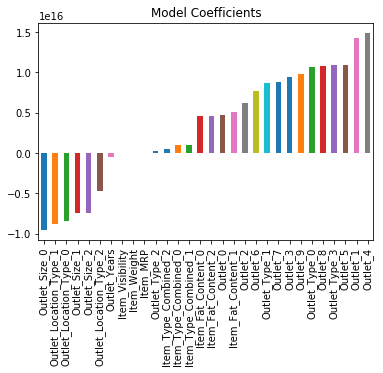

In [46]:
#Print model report:
print ("\nModel Report")
print ("RMSE : {}".format(np.sqrt(metrics.mean_squared_error(X_test, dtrain_predictions))))
coef1 = pd.Series(alg1.coef_, X_train.columns).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')

C:\Users\kd\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


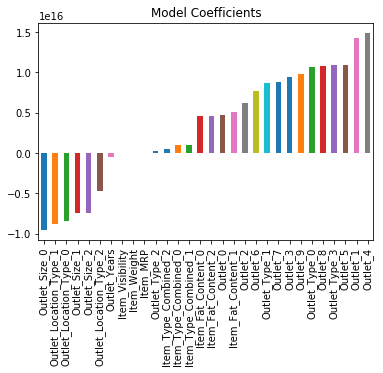

In [60]:
coef1 = pd.Series(alg1.coef_, Y_train.columns).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')

# Saving in to the file
#Export submission file:
#IDcol.append(target)
test_1 = test[['Item_Identifier','Outlet_Identifier']]#.append(target)
#submission = pd.DataFrame({ x: Y_train[x] for x in test_1})
test_1['Item_Outlet_Sales'] = (np.sqrt(metrics.mean_squared_error(X_test, dtrain_predictions)))
test_1 = pd.DataFrame(test_1)
#test_1.to_csv(alg1, index=False)

In [65]:
test_1.to_csv('alg1.csv', index=False)